In [109]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests

API_KEY = 'c21060f6c60e4209a75e2827e736e37e'
url = ('https://newsapi.org/v2/top-headlines?'
       'language=en&'
       'pageSize=10&'
       f'apiKey={API_KEY}')

response = requests.get(url)
data = response.json()

headlines = [article['title'] for article in data['articles'] if article['title']]
descriptions = [article['description'] or '' for article in data['articles']]

# Combine for analysis
news_items = list(zip(headlines, descriptions))


In [15]:
o=len(news_items)
print(o)

9


In [3]:
news_items

[('Trump does not intend to sign joint G7 statement on Iran - CNN',
  'President Donald Trump does not intend to sign a joint statement calling for de-escalation between Israel and Iran that had been drafted by G7 leaders in Canada, according to a person familiar with the matter, though officials preparing the document held out …'),
 ("'Lilo & Stitch' Actor David Hekili Kenui Bell Dead - TMZ",
  'Actor David Hekili Kenui Bell -- who recently appeared in Disney’s live-action "Lilo & Stitch" -- has sadly died ... his family just confirmed to TMZ.'),
 ('What to know about the shootings of 2 Minnesota lawmakers and the arrest of Vance Boelter - AP News',
  'The man suspected of killing one Minnesota lawmaker and wounding another is now charged with murder after police arrested him Sunday near his home after a nearly two-day search. Vance Boelter is accused of posing as a police officer and fatally shooting forme…'),
 ('Wall Street recovers from Friday’s shock as US stocks rise and oil pric

In [5]:
def clean_text(text):
    # Your preprocessing logic here
    text = text.lower()
    # Remove punctuation, stopwords, etc.
    return text

processed = [clean_text(h + " " + d) for h, d in news_items]

In [7]:
import joblib

tfidf = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('logistic_model.pkl')

# Transform the new headlines
X_new = tfidf.transform(processed)
predictions = model.predict(X_new)

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

vader_scores = [vader.polarity_scores(text)['compound'] for text in processed]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
for i, (headline, desc) in enumerate(news_items):
    print(f"\nHeadline {i+1}: {headline}")
    print(f"Description: {desc}")
    print(f"Model Prediction: {'Positive' if predictions[i] == 1 else 'Negative'}")
    print(f"VADER Score: {vader_scores[i]}")



Headline 1: Trump does not intend to sign joint G7 statement on Iran - CNN
Description: President Donald Trump does not intend to sign a joint statement calling for de-escalation between Israel and Iran that had been drafted by G7 leaders in Canada, according to a person familiar with the matter, though officials preparing the document held out …
Model Prediction: Negative
VADER Score: 0.0258

Headline 2: 'Lilo & Stitch' Actor David Hekili Kenui Bell Dead - TMZ
Description: Actor David Hekili Kenui Bell -- who recently appeared in Disney’s live-action "Lilo & Stitch" -- has sadly died ... his family just confirmed to TMZ.
Model Prediction: Negative
VADER Score: -0.8934

Headline 3: What to know about the shootings of 2 Minnesota lawmakers and the arrest of Vance Boelter - AP News
Description: The man suspected of killing one Minnesota lawmaker and wounding another is now charged with murder after police arrested him Sunday near his home after a nearly two-day search. Vance Boelter is 

In [129]:
import pandas as pd

df = pd.DataFrame({
    'Headline': [h for h, _ in news_items],
    'Description': [d for _, d in news_items],
    'Model_Prediction': ['Positive' if p == 1 else 'Negative' for p in predictions],
    'VADER_Score': vader_scores
})

display(df)


,Headline,Description,Model_Prediction,VADER_Score
0,Stock Market Today: Dow Futures Edge Up; Nasda...,,Negative,0.3400
1,Israeli military recovers two hostages' bodies...,"Israeli Americans Judi Weinstein Haggai, 70, a...",Negative,-0.8126
2,New Zealand Parliament votes for record suspen...,New Zealand legislators have voted to enact re...,Negative,-0.6808
3,US updates: Trump announces full travel ban fo...,The White House has announced a new travel ban...,Negative,-0.8020
4,Judge bars Trump administration from deporting...,A federal judge barred the Trump administratio...,Negative,-0.7269
5,"Horoscope for Thursday, 6/05/25 by Christopher...",ARIES (March 20 - April 18): Don't try talking...,Negative,0.6269


In [5]:
import pandas as pd

In [7]:
df=pd.read_csv("train.csv")

In [8]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [11]:
df.tail()

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [13]:
df.columns = ['Class_Index', 'Title', 'Description']
df['Text'] = df['Title'] + " " + df['Description']
df = df[['Text']]  # We on

In [15]:
df.head()

,Text
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def label_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.3:
        return 1  # Positive
    elif score <= -0.3:
        return 0  # Negative
    else:
        return None

In [26]:
#here we apply the function to col text and asisgn it to the new column 
df['label'] = df['Text'].apply(label_sentiment)


In [27]:
df.head()

,Text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,NaN
1,Carlyle Looks Toward Commercial Aerospace (Reu...,1.0
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,0.0
3,Iraq Halts Oil Exports from Main Southern Pipe...,NaN
4,"Oil prices soar to all-time record, posing new...",0.0


In [33]:
df['Text'][3]

'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.'

In [31]:
df['label'].value_counts()

label
1.0    44492
0.0    36504
Name: count, dtype: int64

In [37]:
df_filtered = df[df['label'].isin([1.0, 0.0])].reset_index(drop=True)


In [47]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80996 entries, 0 to 80995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    80996 non-null  object 
 1   label   80996 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [55]:
df_filtered.head()

,Text,label
0,Carlyle Looks Toward Commercial Aerospace (Reu...,1.0
1,Oil and Economy Cloud Stocks' Outlook (Reuters...,0.0
2,"Oil prices soar to all-time record, posing new...",0.0
3,"Stocks End Up, But Near Year Lows (Reuters) Re...",1.0
4,Fed minutes show dissent over inflation (USATO...,1.0


In [61]:
# df_filtered['label'].rename("Label") 
df_filtered = df_filtered.rename({'label': 'Label'}, axis='columns')


In [63]:
df_filtered

,Text,Label
0,Carlyle Looks Toward Commercial Aerospace (Reu...,1.0
1,Oil and Economy Cloud Stocks' Outlook (Reuters...,0.0
2,"Oil prices soar to all-time record, posing new...",0.0
3,"Stocks End Up, But Near Year Lows (Reuters) Re...",1.0
4,Fed minutes show dissent over inflation (USATO...,1.0
...,...,...
80991,Syria Redeploys Some Security Forces in Lebano...,1.0
80992,Pakistan's Musharraf Says Won't Quit as Army C...,1.0
80993,Renteria signing a top-shelf deal Red Sox gene...,1.0
80994,Today's NFL games PITTSBURGH at NY GIANTS Time...,0.0


In [71]:
pip install transformers


   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.5 MB 11.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/10.5 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.5 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.5 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.5 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.5 MB 5.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.5 MB 4.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.5 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.5 MB 4.3 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/10.5 MB 4.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.5 MB 4.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.5 MB 4.4 MB/s eta 0:00:02
   --

In [73]:
from transformers import pipeline  # ✅ correct


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [77]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/376.0 MB 17.3 MB/s eta 0:00:22
   ---------------------------------------- 0.7/376.0 MB 8.6 MB/s eta 0:00:44
   ---------------------------------------- 0.8/376.0 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 1.0/376.0 MB 6.3 MB/s eta 0:01:00
   ---------------------------------------- 1.2/376.0 MB 5.5 MB/s eta 0:01:08
   ---------------------------------------- 1.4/376.0 MB 5.0 MB/s eta 0:01:15
   ---------------------------------------- 1.6/376.0 MB 5.0 MB/s eta 0:01:15
   ---------------------------------------- 1.8/376.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 1.9/376.0 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 2.1/376.0 MB 4.5 MB/s eta 0:01:23
   ---------------------------------------- 2.3/376.0 MB 4.5 MB/s eta 0:01:23
   ---------------------------------------- 2.4/376.0 MB 4.5 MB/s eta 

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


ImportError: Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [87]:
import tensorflow as tf
print(tf.__version__)

ImportError: Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


ImportError: Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [81]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_filtered['Text'])
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, padding='post', maxlen=20)

NameError: name 'Tokenizer' is not defined

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X=Vectorizer.fit_transform(df_filtered['Text'])
y=df_filtered['Label']


In [66]:
df_filtered

,Text,Label
0,Carlyle Looks Toward Commercial Aerospace (Reu...,Good
1,Oil and Economy Cloud Stocks' Outlook (Reuters...,Bad
2,"Oil prices soar to all-time record, posing new...",Bad
3,"Stocks End Up, But Near Year Lows (Reuters) Re...",Good
4,Fed minutes show dissent over inflation (USATO...,Good
...,...,...
92533,Syria Redeploys Some Security Forces in Lebano...,Good
92534,Pakistan's Musharraf Says Won't Quit as Army C...,Good
92535,Renteria signing a top-shelf deal Red Sox gene...,Good
92536,Today's NFL games PITTSBURGH at NY GIANTS Time...,Bad


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)



In [71]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

         Bad       0.92      0.87      0.89      8422
        Good       0.90      0.94      0.92     10086

    accuracy                           0.91     18508
   macro avg       0.91      0.90      0.91     18508
weighted avg       0.91      0.91      0.91     18508

🧾 Confusion Matrix:
[[7330 1092]
 [ 635 9451]]


In [73]:
df_test= pd.read_csv("test.csv")
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [77]:
df_test.columns = ['Class_Index', 'Title', 'Description']
df_test['Text'] = df_test['Title'] + " " + df_test['Description']
df_test = df_test[['Text']] 

In [79]:
df_test.head()

,Text
0,Fears for T N pension after talks Unions repre...
1,The Race is On: Second Private Team Sets Launc...
2,Ky. Company Wins Grant to Study Peptides (AP) ...
3,Prediction Unit Helps Forecast Wildfires (AP) ...
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...


In [83]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [87]:
import joblib
joblib.dump(Vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'logistic_model.pkl')

# Load model and vectorizer
model = joblib.load("logistic_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [89]:
X_test = Vectorizer.transform(df_test['Text'])  # Do NOT fit again


In [91]:
df_test['Prediction'] = model.predict(X_test)

In [143]:
df_test.filter()

TypeError: Must pass either `items`, `like`, or `regex`

In [133]:
df_test['Text']

0       Fears for T N pension after talks Unions repre...
1       The Race is On: Second Private Team Sets Launc...
2       Ky. Company Wins Grant to Study Peptides (AP) ...
3       Prediction Unit Helps Forecast Wildfires (AP) ...
4       Calif. Aims to Limit Farm-Related Smog (AP) AP...
                              ...                        
7595    Around the world Ukrainian presidential candid...
7596    Void is filled with Clement With the supply of...
7597    Martinez leaves bitter Like Roger Clemens did ...
7598    5 of arthritis patients in Singapore take Bext...
7599    EBay gets into rentals EBay plans to buy the a...
Name: Text, Length: 7600, dtype: object

In [145]:
import numpy as np

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get coefficients (for binary classification, shape = [1, n_features])
coefficients = model.coef_[0]

# Top positive words (predicting 'Good')
top_pos_indices = np.argsort(coefficients)[-20:]  # 20 highest
top_pos_words = feature_names[top_pos_indices]
top_pos_scores = coefficients[top_pos_indices]

# Top negative words (predicting 'Bad')
top_neg_indices = np.argsort(coefficients)[:20]  # 20 lowest
top_neg_words = feature_names[top_neg_indices]
top_neg_scores = coefficients[top_neg_indices]


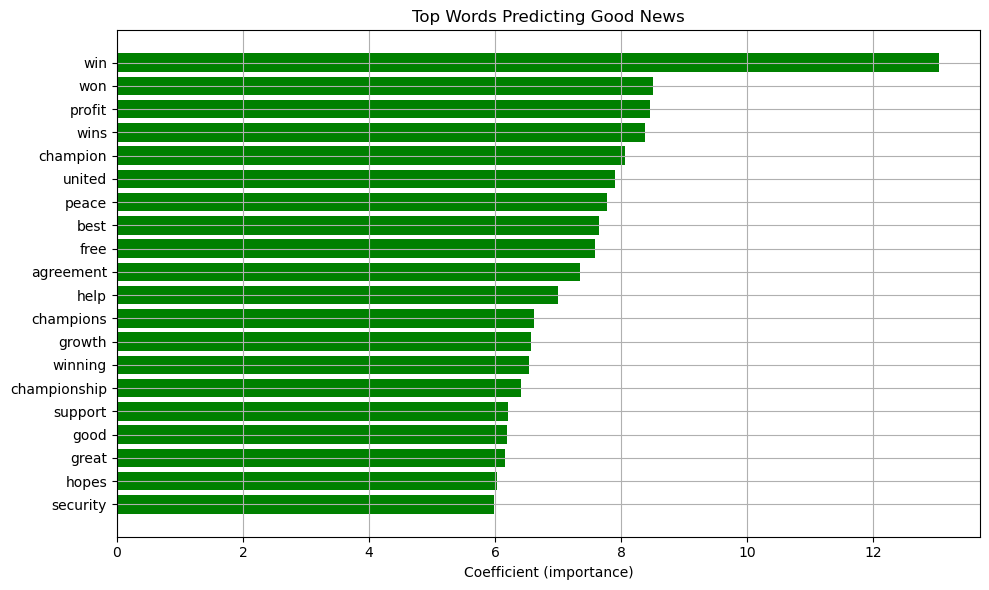

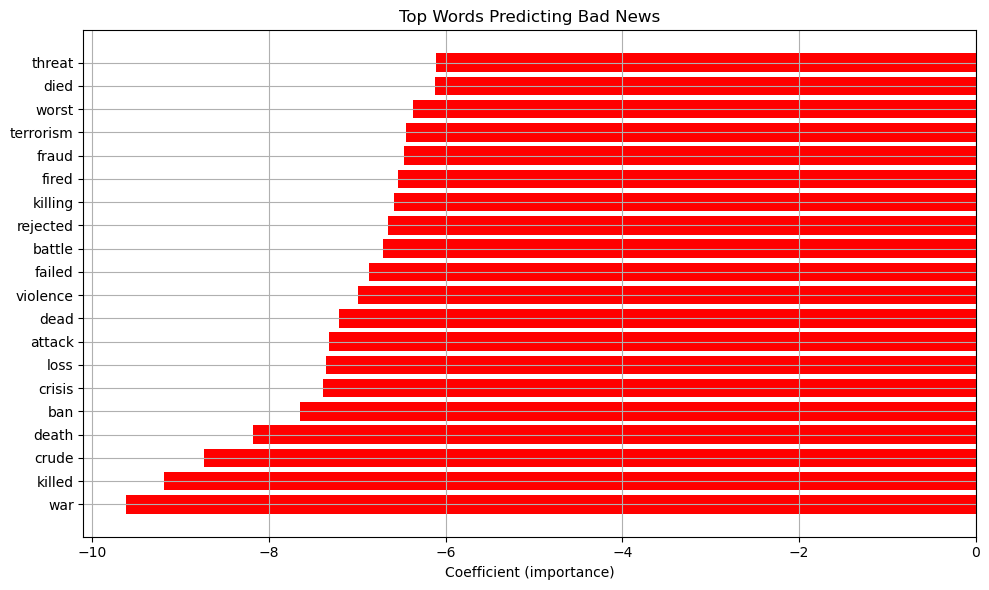

In [147]:
import matplotlib.pyplot as plt

def plot_words(words, scores, title, color):
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color=color)
    plt.xlabel("Coefficient (importance)")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot good and bad separately
plot_words(top_pos_words, top_pos_scores, "Top Words Predicting Good News", "green")
plot_words(top_neg_words, top_neg_scores, "Top Words Predicting Bad News", "red")
